# Missing values and detrending in Time Series

### Notebook by **David Andrés** 🤖📈🐍 

#### for [💊Machine Learning Pills💊](https://mlpills.dev/)

**Follow me on Twitter**: [@daansan_ml](https://twitter.com/daansan_ml)




---------------

Let's install the libraries we will need and import them

In [1]:
import numpy as np
import pandas as pd 

import datetime

import matplotlib.pyplot as plt

## Import dataset

First we need to import the dataset. 

In this notebook we will work with data about the monthly beer production in Australia.

In [2]:
df = pd.read_csv("dataset/monthly-beer-production-in-austr.csv")

### Exploratory Data Analysis

Let's check now how the dataset looks like.

In [3]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In time series we need the index of the dataframe to be the date.

First, let's double-check that the date is in the right format (datetime).

In [4]:
df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

The `Month` column is not a datetime type. So let's convert it!

In [5]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

We can now verify that the changes are correct.

In [6]:
df.dtypes

Month                      datetime64[ns]
Monthly beer production           float64
dtype: object

Let's set the date (`Month`) as the index.

In [7]:
df = df.set_index('Month')

And finally verify that it worked.

In [8]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


We have it now as we wanted, the index of the dataframe is the date.

Let's also convert the dataframe to series by selecting the only column present. We can do this here because we are in an univariate case.

In [9]:
df_beer = df['Monthly beer production']

It is important that we also visualize the data.

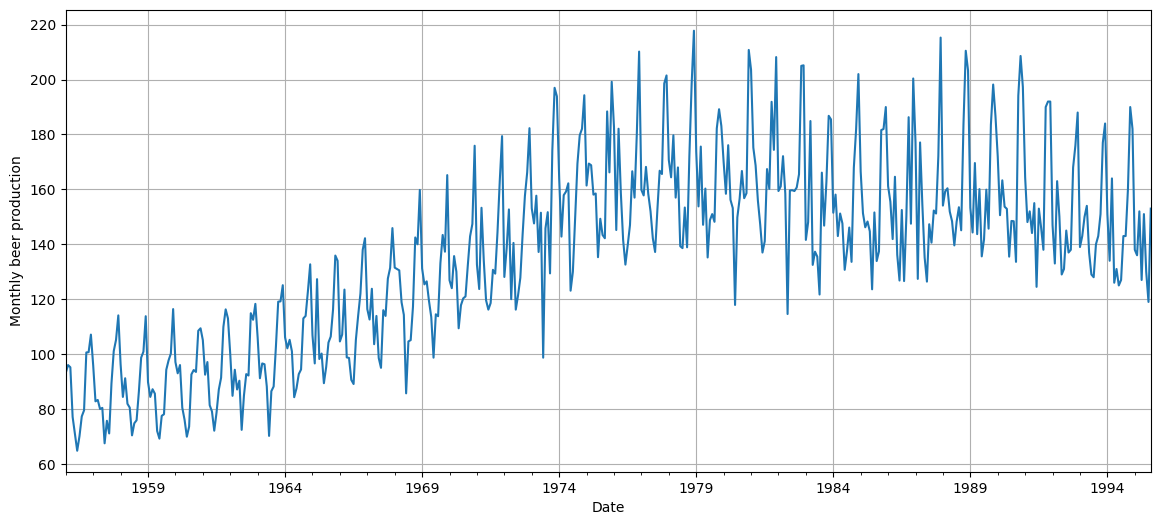

In [10]:
# Import required libraries
import matplotlib.pyplot as plt

# Plot data
df_beer.plot(figsize=(14,6))
plt.xlabel('Date')
plt.ylabel('Monthly beer production')
plt.grid()
plt.show()

Some observations:
* It is non-stationary
* There seems to be a seasonal component
* There is a trend and an increasing variance
* It looks like there are some outliers

### Missing values

We need to check if there are any missing values in the dataframe.

In [11]:
df_beer.isna().sum()

0

Fortunately for us there are not.

If there were you could handle them in some of the following ways.

### Remove the trend

The first step to achieving that is to remove the trend. There are many ways of achieving this, we will use *differencing*.

In [12]:
df_beer = df_beer.diff()

We need to drop the first *NaN* value coming from taking the difference.

In [13]:
df_beer = df_beer.dropna()

We can now see how it looks.

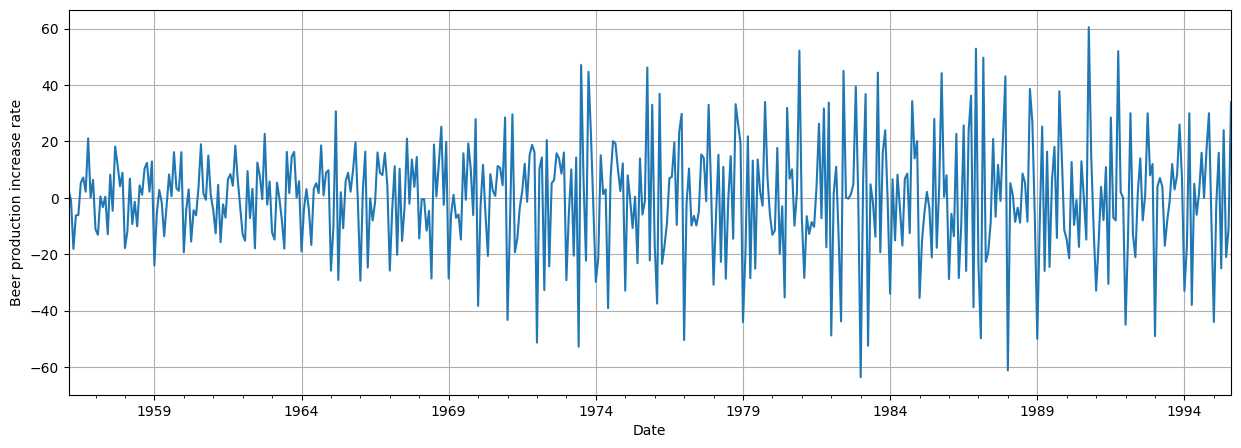

In [14]:
df_beer.plot(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Beer production increase rate')
plt.grid()
plt.show()

You can see that now it is centered around zero.

However, we still have increasing volatility, which we need to address to achieve stationarity.

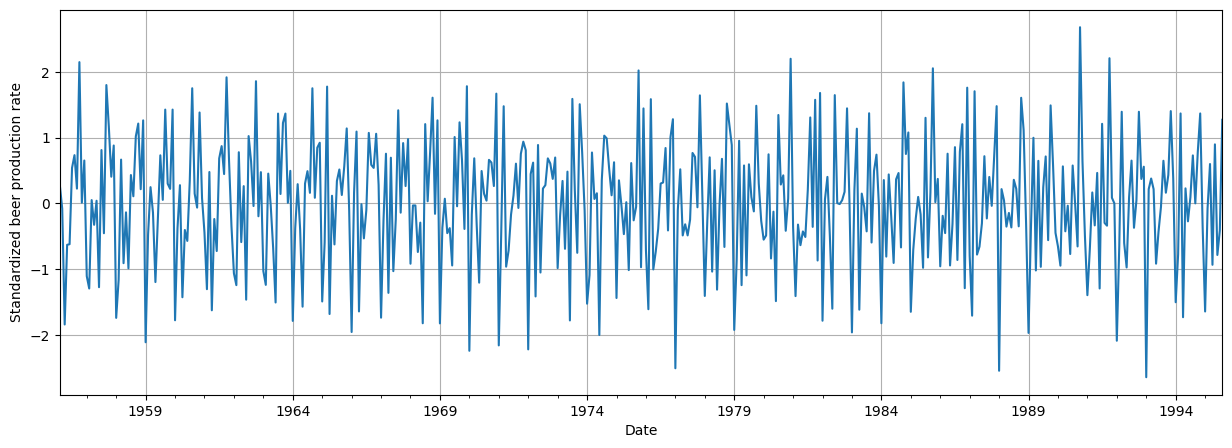

In [15]:
# Calculate each year's variance (equivalent to standard deviation)
annual_variance = df_beer.groupby(df_beer.index.year).std()
mapped_annual_variance = df_beer.index.map(
    lambda x: annual_variance.loc[x.year])

# Standardize each year's variance
df_beer = df_beer / mapped_annual_variance

# Plot outcome
df_beer.plot(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Standardized beer production rate')
plt.grid()
plt.show()

We can finally see how our data has a constant variance and mean. We are now a step closer to achieving stationarity! 

We will see in the next article how we can go further and check and remove the seasonality! See you there! 

------

#### [💊Machine Learning Pills💊](https://mlpills.dev/)

**Follow me on Twitter**: [@daansan_ml](https://twitter.com/daansan_ml)

### **David Andrés** 🤖📈🐍 